## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 3 #

### esercizio 3.1

In questo esercizio abbiamo simulato numericamente i prezzi di una call-option e di una put-option europee, in modo da confrontare i nostri risultati con quelli analitici dati dalla teoria di Black-Scholes.

Il prezzo $S$ di un asset la cui evoluzione nel tempo è data da un moto browniano geometrico, $S\sim GBM(\mu,\sigma^2)$, avente un valore iniziale $S(0)$, al tempo $t$ è dato dalla formula:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    dove $W(t)\sim\mathcal{N}(0,t)$.
    
Tuttavia, dato che gli incrementi di $W$ sono indipendenti e distribuiti normalmente, c'è una semplice formula ricorsiva per stimare il valore di $S(t)$, dato però $S(t_i)$:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$
    
Dato $S(0)$, è pertanto possibile stimare $S(T)$ in due diversi modi. Il primo è per via diretta, usando la prima formula data. Il secondo invece discretizzando il moto browniano geometrico, dividendo l'intervallo $[0,T]$ in $N$ sottointervalli e utilizzando la seconda formula data.

Il valore della call-option $C[S(0),0]$ è poi dato da $e^{-rT} \big < (S(T) - K)^{+} \big >$, dove $(S(T) - K)^{+} = max(0, S(T)-K)$

Mentre il prezzo dell put-option $P[S(0),0]$ è dato da $e^{-rT} \big < (K-S(T)^{+} \big >$, dove $(K-S(T))^{+} = max(0, K-S(T))$

Abbiamo stimato il valore medio di $C$ e $P$ sia nel modo diretto che discretizzato. Per fare questo abbiamo, in entrambi i casi, simulato un moto browniano geometrico per $M=10^5$ volte, ogni volta andando poi a stimare il valore di call e put. Abbiamo poi ottenuto il valore medio di tali grandezze con il metodo del data blocking, suddividendo le stime in $100$ blocchi.

I parametri usati in questa simulazione sono i seguenti:
- prezzo dell'asset at $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo pattuito: $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

I risultati attesi, ottenuti secondo la teoria analitica di Black-Scholes, sono i seguenti:

- call:  $14.975790778311286$
- put:  $5.4595325819072364$

Riportiamo di seguito i risultati ottenuti. Nei grafici è riportata la differenza tra il valore medio trovato (con la sua incertezza) e il valore atteso, in funzione del numero di blocchi.



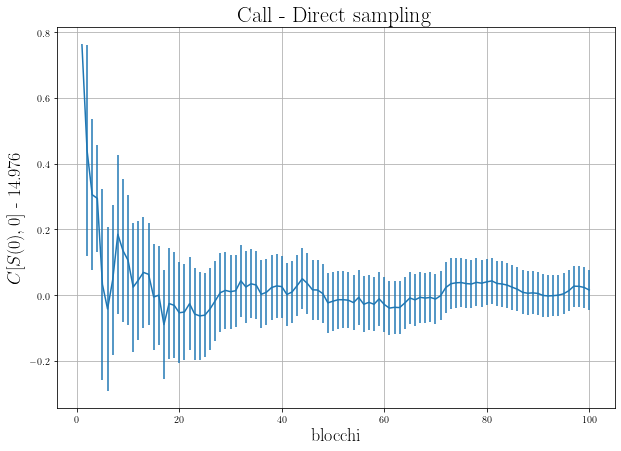

Risultato finale : 
14.9914
Incertezza: 
0.0615667


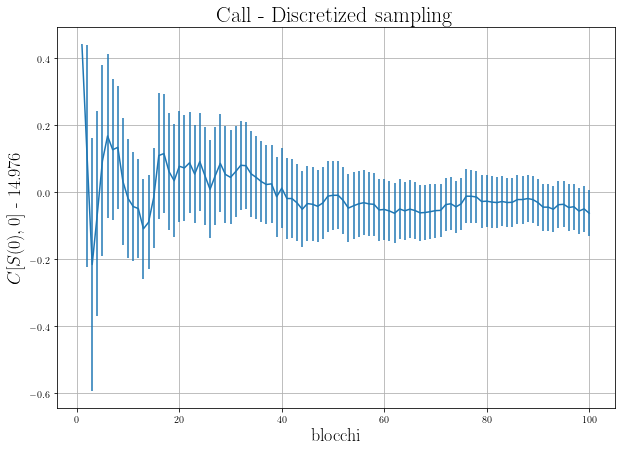

Risultato finale : 
14.9138
Incertezza: 
0.0691452


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

## call

##direct
x, f, error = np.loadtxt("c1.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f-14.975790778311286,yerr=error)
plt.title("Call - Direct sampling", fontsize = 22)
plt.xlabel('blocchi', fontsize = 18)
plt.ylabel('$C[S(0), 0]$ - 14.976', fontsize=18)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Incertezza: ')
print(error[-1])

##discretized
x, f, error = np.loadtxt("c2.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f-14.975790778311286,yerr=error)
plt.title("Call - Discretized sampling", fontsize = 22)
plt.xlabel('blocchi', fontsize = 18)
plt.ylabel('$C[S(0), 0]$ - 14.976', fontsize=18)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Incertezza: ')
print(error[-1])


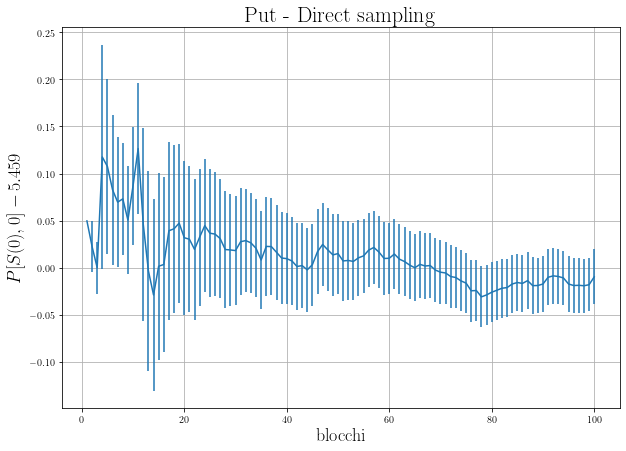

Risultato finale: 
5.44982
Incertezza: 
0.0292296


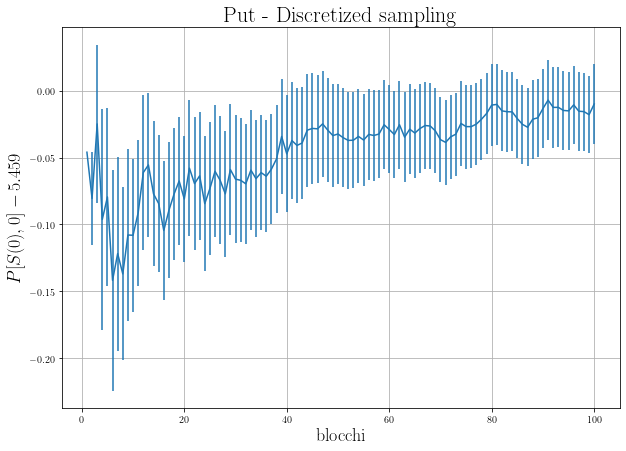

Risultato finale: 
5.44955
Incertezza: 
0.0297696


In [11]:
## put

##direct
x, f, error = np.loadtxt("p1.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f-5.4595325819072364,yerr=error)
plt.title("Put - Direct sampling", fontsize = 22)
plt.xlabel('blocchi', fontsize = 18)
plt.ylabel('$P[S(0), 0] - 5.459$', fontsize=18)
plt.grid(True)
plt.show()

print('Risultato finale: ')
print(f[-1])
print('Incertezza: ')
print(error[-1])

##discretized
x, f, error = np.loadtxt("p2.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f-5.4595325819072364,yerr=error)
plt.title("Put - Discretized sampling", fontsize = 22)
plt.xlabel('blocchi', fontsize = 18)
plt.ylabel('$P[S(0), 0] - 5.459$', fontsize=18)
plt.grid(True)
plt.show()

print('Risultato finale: ')
print(f[-1])
print('Incertezza: ')
print(error[-1])

Si può notare come tutti i risultati ottenuti siano compatibili con quelli attesi.